# WEATHER TYPE PREDICTION

 Importing necessary libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump


Loading Dataset

In [2]:
# Load dataset
weather_data = pd.read_csv(r'C:\Users\DELL\Downloads\Weather Prediction\weather_classification_data.csv')

In [3]:
# Display the first few rows
weather_data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


### Exploratory Data Analysis (EDA)

In [4]:
weather_data.shape

(13200, 11)

In [5]:
weather_data.info

<bound method DataFrame.info of        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV

In [6]:
# Check for missing values
print("Missing values in the dataset:\n", weather_data.isnull().sum())

Missing values in the dataset:
 Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


In [7]:
# Drop rows with missing values (if any)
weather_data.dropna(inplace=True)

In [8]:
# checking for any duplicate values in the dataset
weather_data[weather_data.duplicated(weather_data.columns[:-1])]

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type


In [9]:
# Check basic statistics of numerical columns
print("\nStatistical summary of the dataset:\n")
print(weather_data.describe())


Statistical summary of the dataset:

        Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.80000

In [10]:
#viewing the unique Weather Types that this dataset have
weather_data["Weather Type"].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

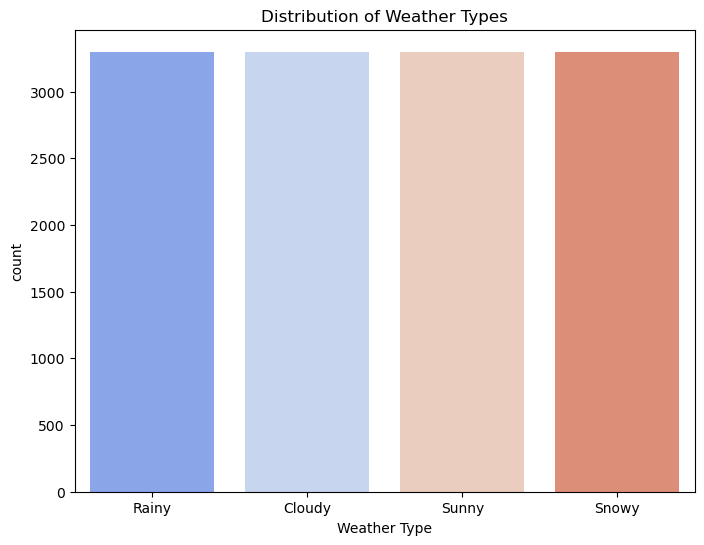

In [11]:
# Plot the distribution of the target variable (Weather Type)
plt.figure(figsize=(8, 6))
sns.countplot(x='Weather Type', data=weather_data, palette='coolwarm')
plt.title('Distribution of Weather Types')
plt.show()


### Data Preprocessing

In [12]:
# Extracting the numerical and categorical features
numerical_data = weather_data.select_dtypes(include=['number'])
categorical_data = weather_data.select_dtypes(include=['object', 'category'])

In [13]:
# getting the numerical and categorical columns
numerical_cols = numerical_data.columns
categorical_cols = categorical_data.columns

In [14]:
# no of unique values does each numberical feature haves
numerical_data.nunique() 

Temperature              126
Humidity                  90
Wind Speed                97
Precipitation (%)        110
Atmospheric Pressure    5456
UV Index                  15
Visibility (km)           41
dtype: int64

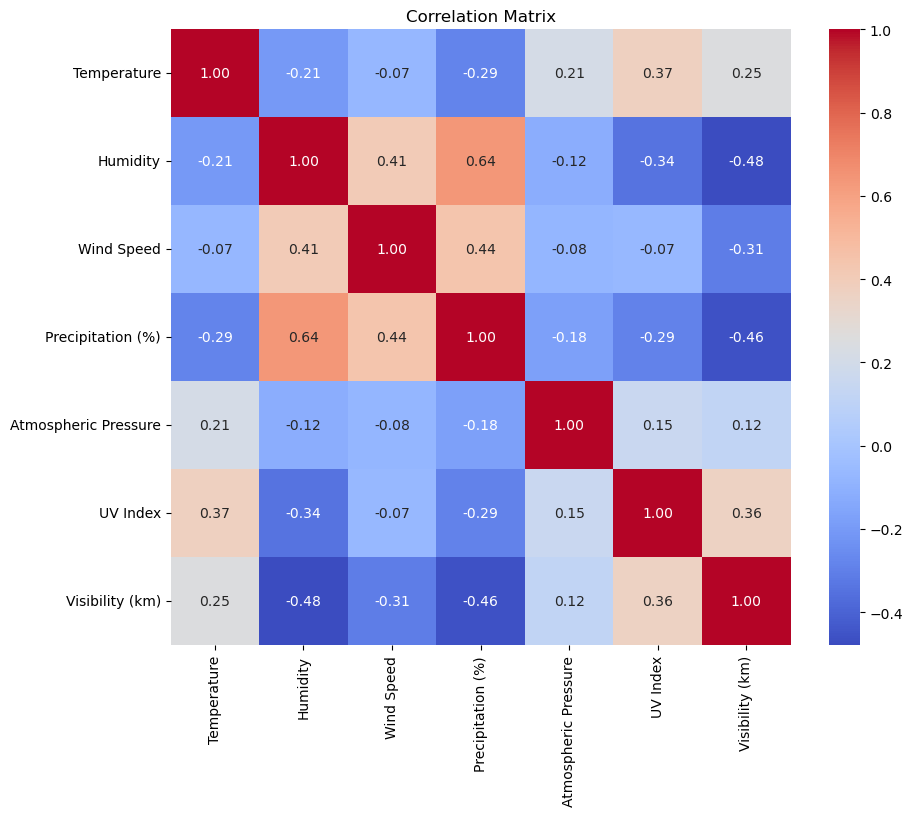

In [15]:
# Plot the correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(weather_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()


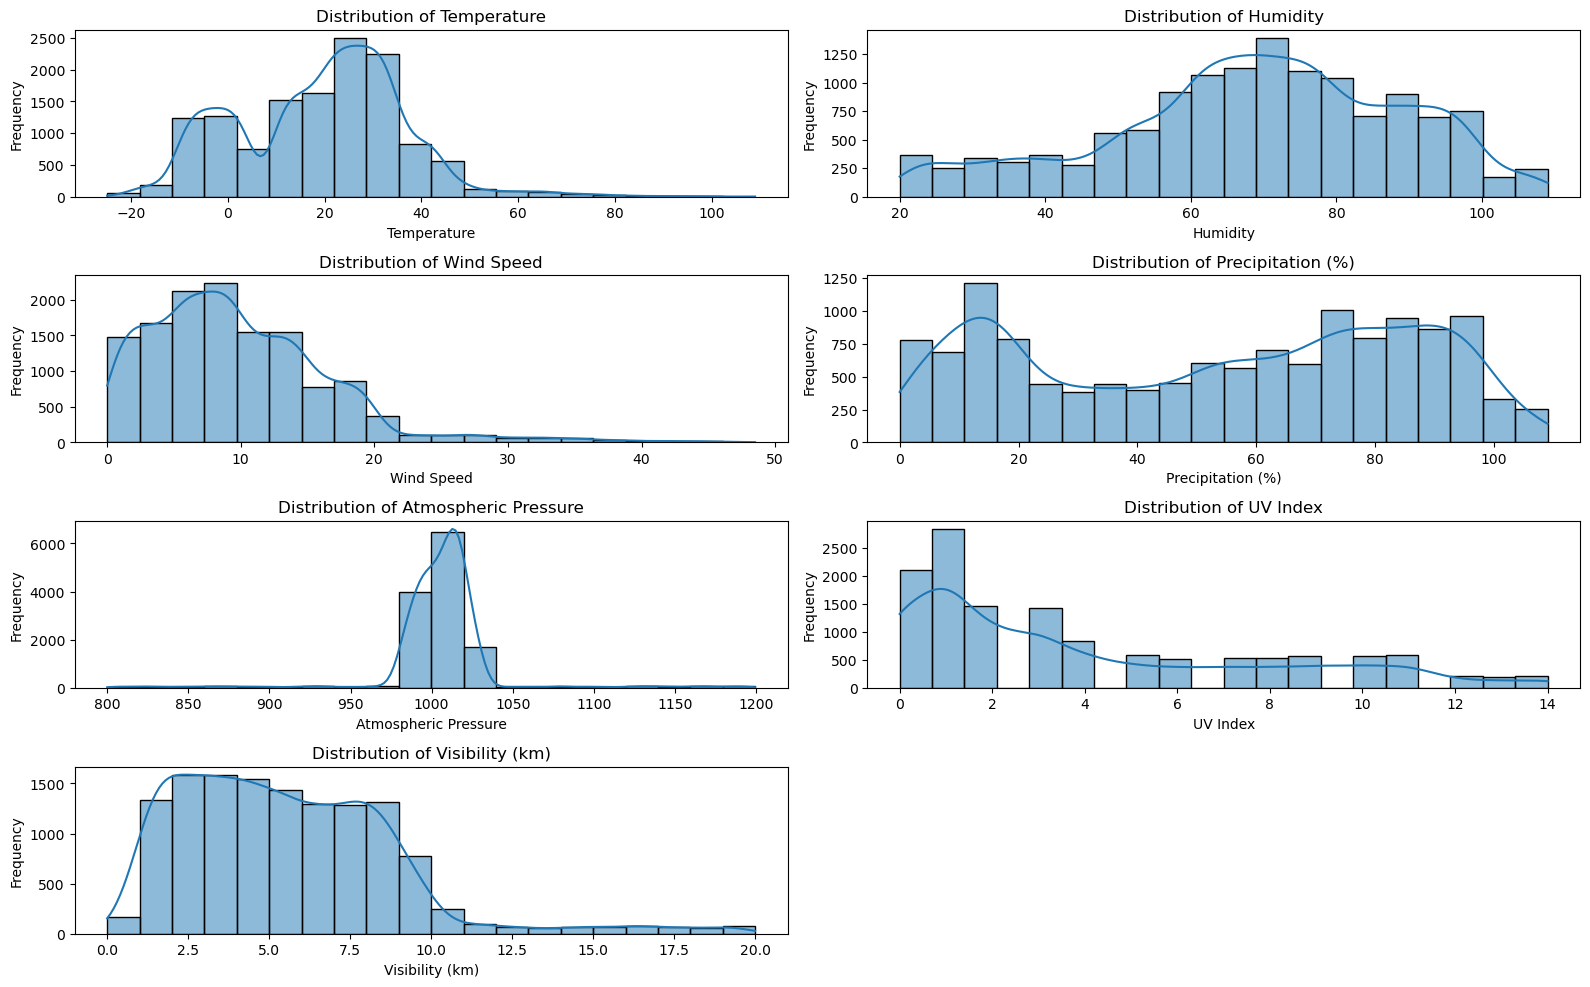

In [16]:
# Set plot size
plt.figure(figsize=(16, 12))

# Loop through each numerical column and plot the distribution
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.histplot(weather_data[col], kde=True, bins=20)  # Histogram with kernel density estimate (KDE)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

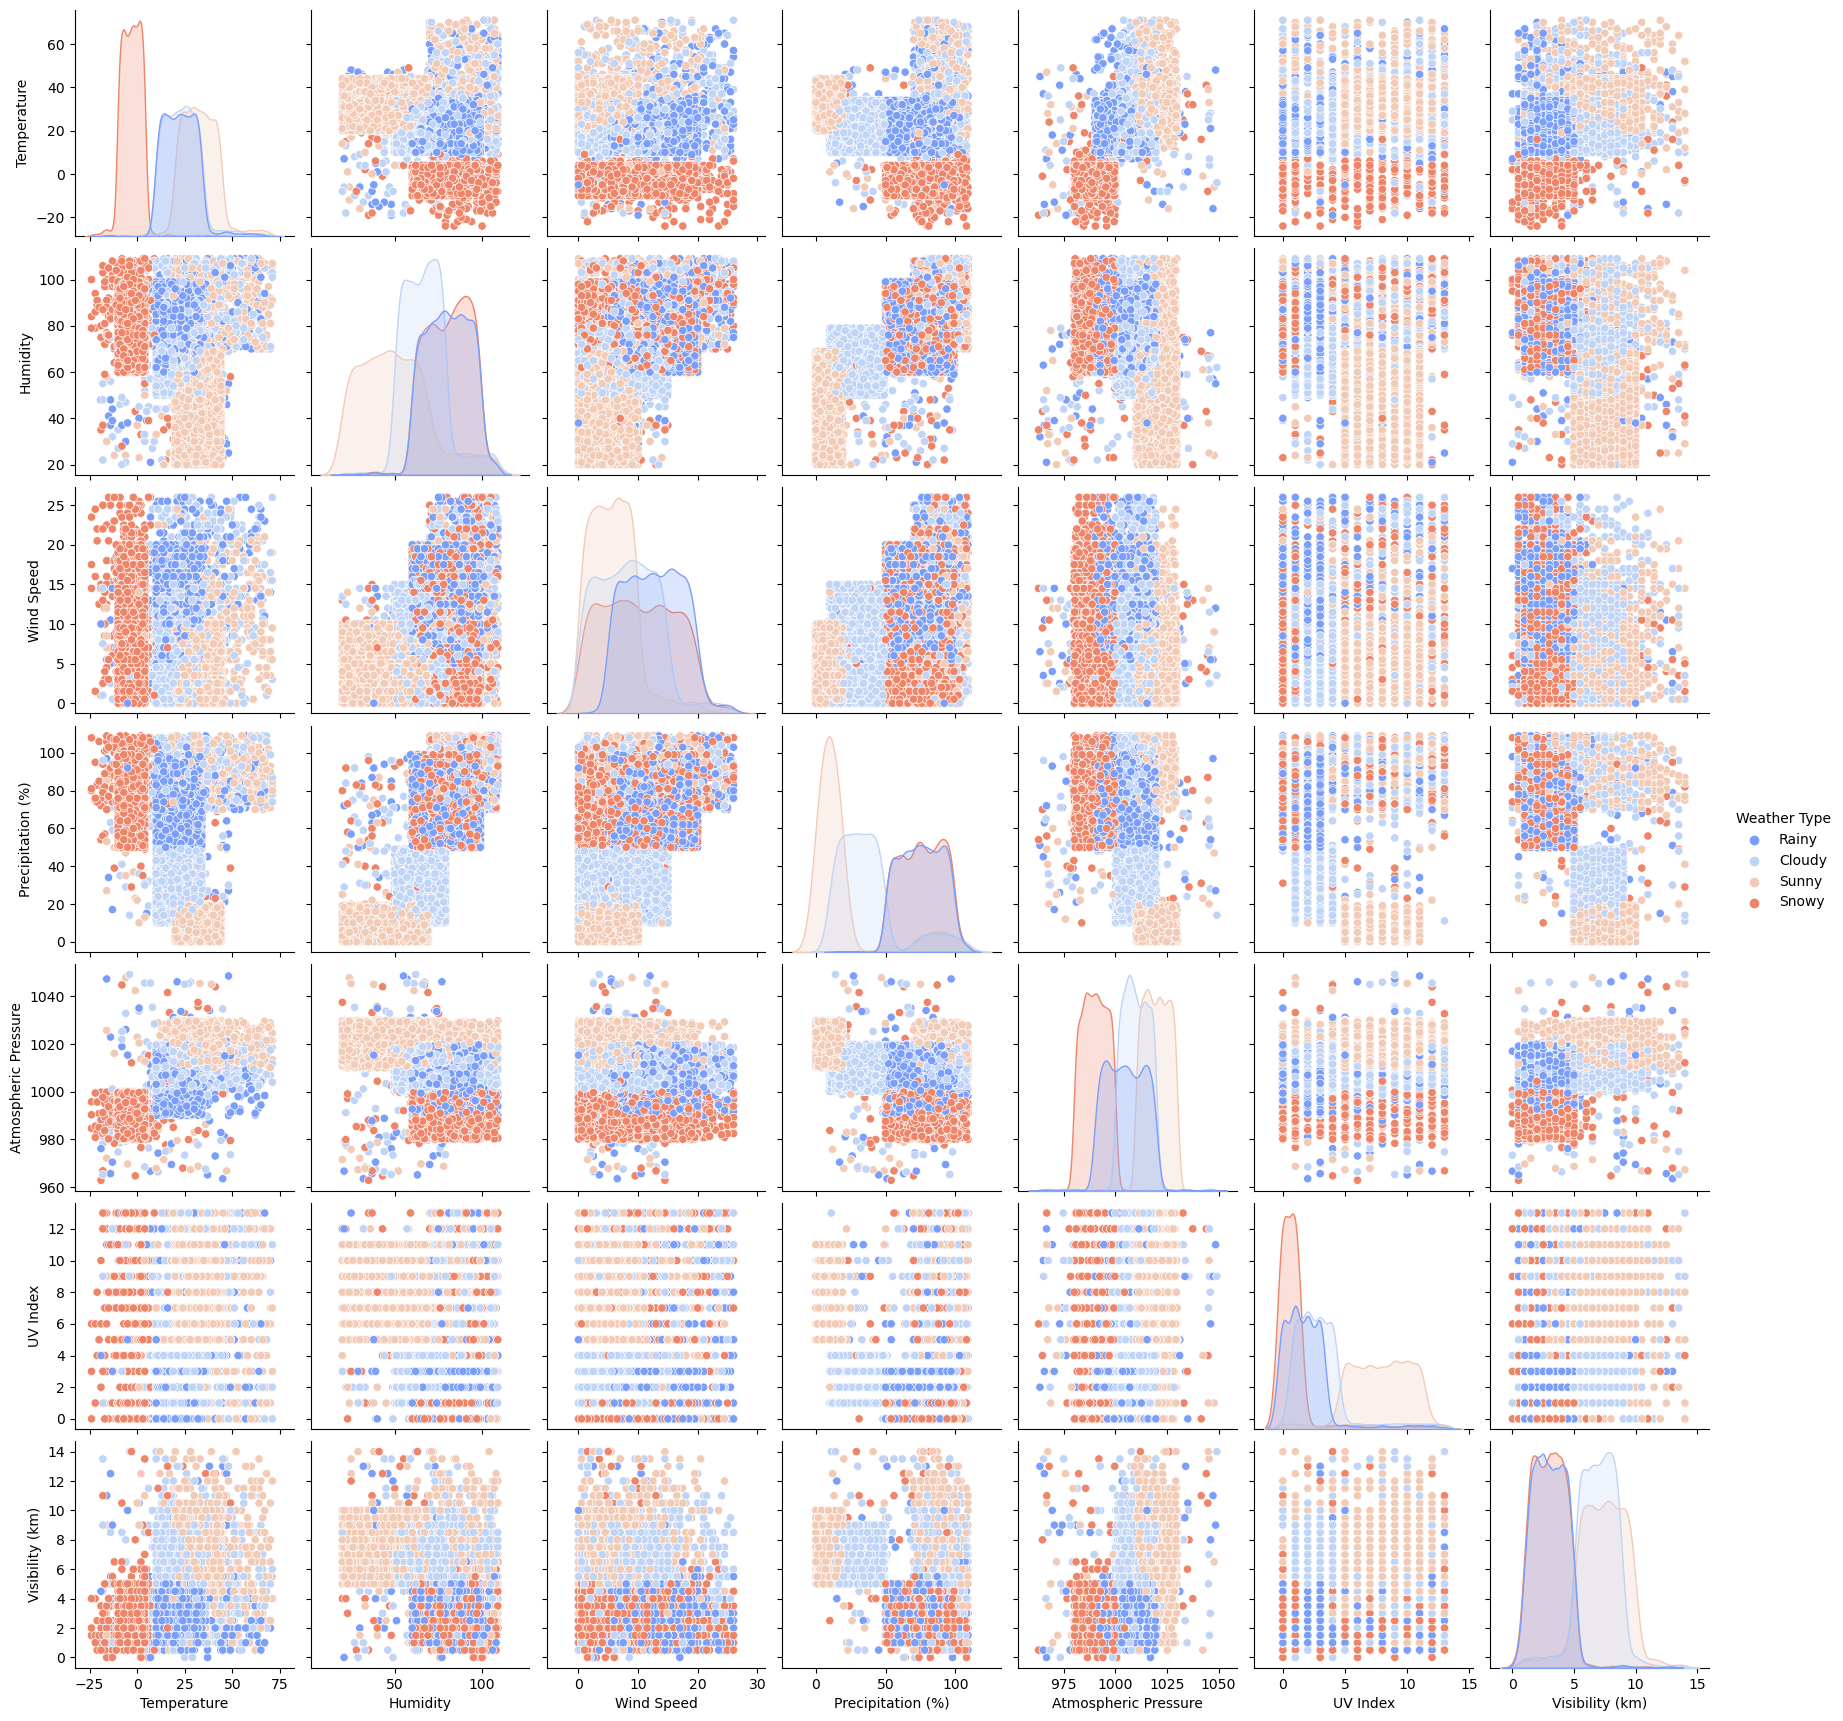

In [40]:
# Plot pairplot to visualize relationships between numerical features and target
sns.pairplot(weather_data, hue="Weather Type", diag_kind="kde", palette="coolwarm")
plt.show()

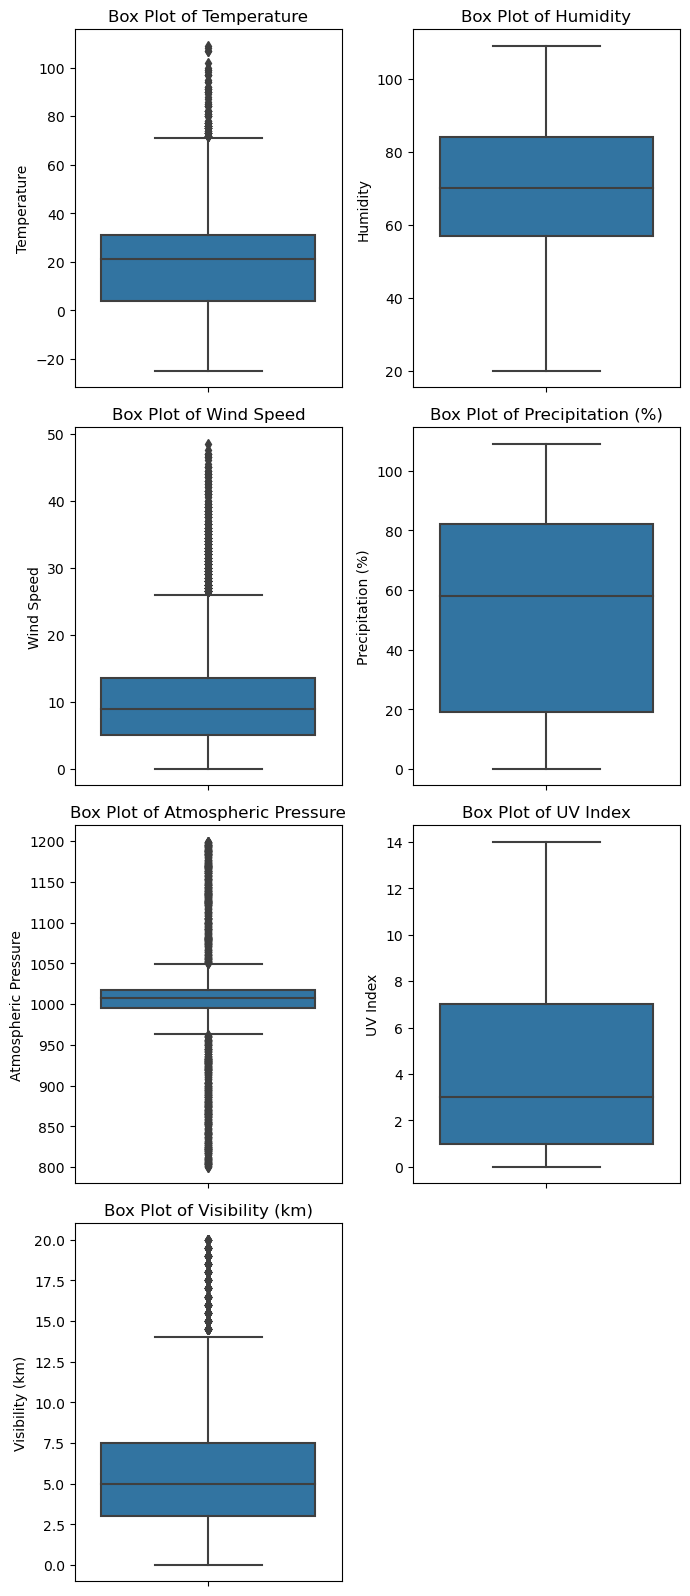

In [18]:
# Set plot size
plt.figure(figsize=(7, 20))

# Loop through each numerical column and plot a box plot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 2, i)
    sns.boxplot(y=weather_data[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [19]:
# Function to remove outliers based on IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Remove outliers
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

# Remove outliers from the numerical columns
weather_data = remove_outliers(weather_data.copy(), numerical_cols)

In [20]:
weather_data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [21]:
# Specify the columns for which to calculate min and max values
columns_to_check = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
                     'Atmospheric Pressure', 'UV Index', 
                    'Visibility (km)' ]

# Calculate min and max values for each column
min_values = weather_data[columns_to_check].min()
max_values = weather_data[columns_to_check].max()

# Display the results
print("Minimum values for each column:")
print(min_values)

print("\nMaximum values for each column:")
print(max_values)

Minimum values for each column:
Temperature             -24.00
Humidity                 20.00
Wind Speed                0.00
Precipitation (%)         0.00
Atmospheric Pressure    962.88
UV Index                  0.00
Visibility (km)           0.00
dtype: float64

Maximum values for each column:
Temperature               71.0
Humidity                 109.0
Wind Speed                26.0
Precipitation (%)        109.0
Atmospheric Pressure    1049.2
UV Index                  13.0
Visibility (km)           14.0
dtype: float64


In [22]:
# Find unique values in 'Cloud Cover', 'Season', and 'Location'
unique_cloud_cover = weather_data['Cloud Cover'].unique()
unique_season = weather_data['Season'].unique()
unique_location = weather_data['Location'].unique()

# Display the unique values
print("Unique values in 'Cloud Cover':")
print(unique_cloud_cover)

print("\nUnique values in 'Season':")
print(unique_season)

print("\nUnique values in 'Location':")
print(unique_location)

Unique values in 'Cloud Cover':
['partly cloudy' 'clear' 'overcast' 'cloudy']

Unique values in 'Season':
['Winter' 'Spring' 'Summer' 'Autumn']

Unique values in 'Location':
['inland' 'mountain' 'coastal']


Splitting the Dataset

In [23]:
# Split the data first
X = weather_data.drop(columns=['Weather Type'])
y = weather_data['Weather Type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Define columns to encode
categorical_columns = ['Cloud Cover', 'Season', 'Location']
numeric_columns = [col for col in X_train.columns if col not in categorical_columns]
# Strip whitespace from categorical columns
for col in categorical_columns:
    X_train[col] = X_train[col].str.strip()
    X_test[col] = X_test[col].str.strip()

# Set up a ColumnTransformer for both OneHotEncoding and passing numeric features as-is
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns),
        ('num', 'passthrough', numeric_columns)
    ]
)

# Fit and transform the training data
X_train_encoded = preprocessor.fit_transform(X_train)

# Transform the test data using the same preprocessor
X_test_encoded = preprocessor.transform(X_test)



In [26]:
preprocessor.named_transformers_['cat'].categories_


[array(['clear', 'cloudy', 'overcast', 'partly cloudy'], dtype=object),
 array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object),
 array(['coastal', 'inland', 'mountain'], dtype=object)]

In [27]:
# Encode target variable after splitting
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [28]:

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


Training the Models

In [29]:
# Initializing classifiers
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}


In [30]:
# Storing accuracy for each model
model_performance = {}

In [31]:
# Train, predict, and evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train_encoded)
    predictions = model.predict(X_test_scaled)
    
    # Get accuracy
    accuracy = accuracy_score(y_test_encoded, predictions)
    model_performance[name] = accuracy
    
    # Print the classification report with decoded labels for better interpretability
    print(f"{name}:\n{classification_report(y_test_encoded, predictions, target_names=label_encoder.classes_)}\n")

Logistic Regression:
              precision    recall  f1-score   support

      Cloudy       0.93      0.95      0.94       597
       Rainy       0.95      0.96      0.96       574
       Snowy       0.99      0.98      0.98       546
       Sunny       0.99      0.96      0.97       601

    accuracy                           0.96      2318
   macro avg       0.96      0.96      0.96      2318
weighted avg       0.96      0.96      0.96      2318


SVM:
              precision    recall  f1-score   support

      Cloudy       0.94      0.96      0.95       597
       Rainy       0.95      0.98      0.97       574
       Snowy       1.00      0.98      0.99       546
       Sunny       0.99      0.96      0.98       601

    accuracy                           0.97      2318
   macro avg       0.97      0.97      0.97      2318
weighted avg       0.97      0.97      0.97      2318


Decision Tree:
              precision    recall  f1-score   support

      Cloudy       0.95      0.9

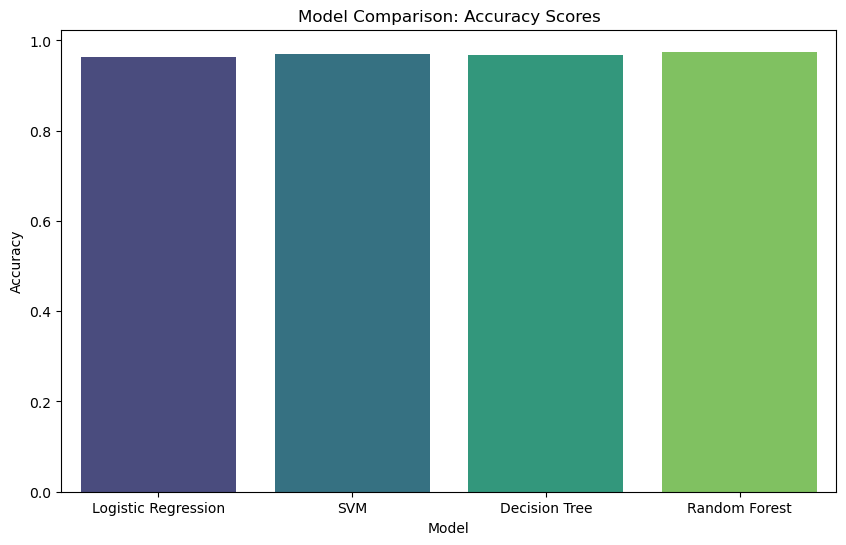

In [32]:
# Visualizing the model performance
plt.figure(figsize=(10,6))
sns.barplot(x=list(model_performance.keys()), y=list(model_performance.values()), palette="viridis")
plt.title('Model Comparison: Accuracy Scores')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()

In [33]:
# Corrected Confusion Matrix Plotting
corrected_labels = label_encoder.inverse_transform(sorted(np.unique(y_train_encoded)))

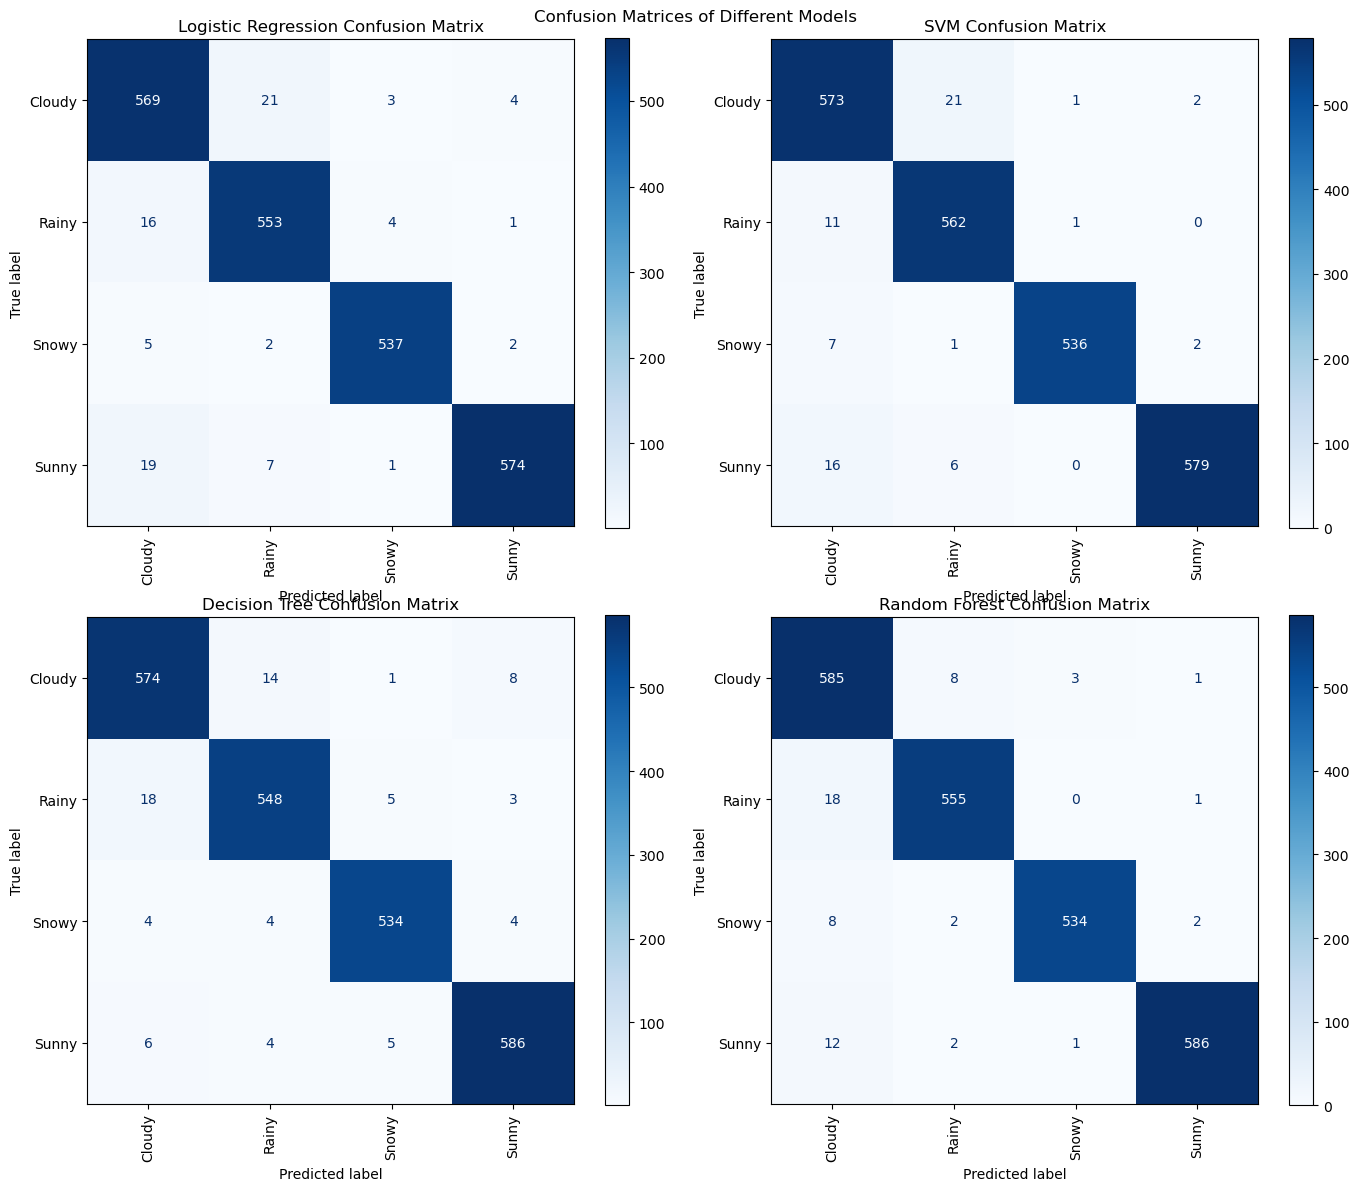

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle("Confusion Matrices of Different Models")

for ax, (name, model) in zip(axes.flatten(), models.items()):
    predictions = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test_encoded, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=corrected_labels)
    disp.plot(ax=ax, cmap="Blues", xticks_rotation="vertical")
    ax.title.set_text(f'{name} Confusion Matrix')

plt.tight_layout()
plt.show()

In [35]:
# Store validation scores
validation_scores = {}

# Perform 5-fold cross-validation for each model
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=5, scoring='accuracy')
    validation_scores[name] = scores.mean()
    print(f"{name} - Validation Accuracy: {scores.mean():.4f}")

# Find the best performing model
best_model_name = max(validation_scores, key=validation_scores.get)
best_model = models[best_model_name]
print(f"Best Performing Model: {best_model_name} with Validation Accuracy: {validation_scores[best_model_name]:.4f}")

Logistic Regression - Validation Accuracy: 0.9572
SVM - Validation Accuracy: 0.9672
Decision Tree - Validation Accuracy: 0.9684
Random Forest - Validation Accuracy: 0.9774
Best Performing Model: Random Forest with Validation Accuracy: 0.9774


Test Accuracy of the Best Model (Random Forest): 0.9758


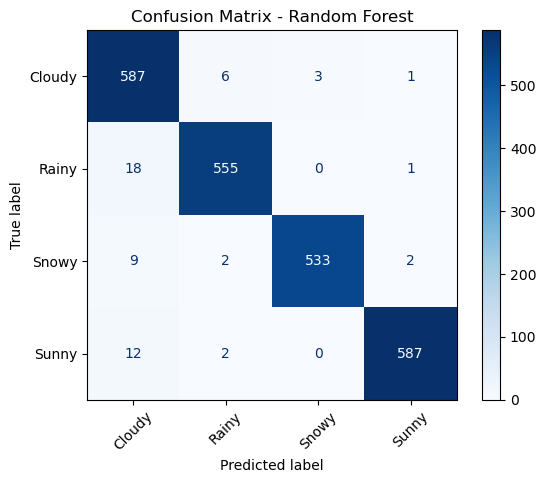

In [36]:
# Train the best performing model on the entire training data
best_model.fit(X_train_scaled, y_train_encoded)

# Predict on the test set
y_pred_test = best_model.predict(X_test_scaled)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test_encoded, y_pred_test)
print(f"Test Accuracy of the Best Model ({best_model_name}): {test_accuracy:.4f}")

# Confusion Matrix for the test set
cm = confusion_matrix(y_test_encoded, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.inverse_transform(sorted(np.unique(y_train_encoded))))
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xticks(rotation=45)
plt.show()

### Testing the Best Model

In [37]:
def test_model_prediction(model, input_data, preprocessor, label_encoder, feature_names):
    # Wrap input data in a DataFrame with feature names
    input_df = pd.DataFrame([input_data], columns=feature_names)

    # Transform the entire input data using the same preprocessor
    input_data_encoded = preprocessor.transform(input_df)
    
    # Predict and decode the weather type
    predicted_weather_encoded = model.predict(input_data_encoded)
    predicted_weather = label_encoder.inverse_transform(predicted_weather_encoded)

    return predicted_weather[0]

In [38]:
# Example input data
input_data = [14, 73, 9.5, 82, 'cloudy', 1010.82, 2, 'Winter', 3.5, 'inland']  # Replace with correct values

# Test model prediction
feature_names = ['Temperature','Humidity','Wind Speed','Precipitation (%)','Cloud Cover','Atmospheric Pressure','UV Index','Season','Visibility (km)','Location']
predicted_weather = test_model_prediction(best_model, input_data,preprocessor, label_encoder,feature_names)
print(f"Predicted Weather Type: {predicted_weather}")

Predicted Weather Type: Sunny


## Conclusion
Based on the evaluation metrics and cross-validation, the Random Forest model performed best with an accuracy of 97.58%. The model’s ability to handle complex interactions between features makes it a suitable choice for weather type prediction.


Saving the Model for Deployement

In [39]:
# Save the model and encoders
dump(best_model, 'best_weather_model.joblib')
dump(preprocessor,'preprocessor.joblib')
dump(label_encoder, 'label_encoder.joblib')

['label_encoder.joblib']